In [2]:
#trying out SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as PipelineSmote
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np



df = pd.read_csv('C:/Users/sarpk/Desktop/TUe courses/Language&AI/assignment/cleaned_extrovert.csv', engine='pyarrow')
X_train, X_test, y_train, y_test = train_test_split(df['post'], df['label'], test_size=0.2, random_state=5)

tfidf = TfidfVectorizer(max_features=1000)  # Adjust the number of features to suit your dataset
X_train_tfidf = tfidf.fit_transform(X_train)

#reduce dimensionality for more efficient use in SMOTE
svd = TruncatedSVD(n_components=100) 
X_train_svd = svd.fit_transform(X_train_tfidf)

# Now apply SMOTE to generate synthetic samples in this reduced feature space
smote = SMOTE(random_state=5)
X_resampled, y_resampled = smote.fit_resample(X_train_svd, y_train)

y_resampled_list = []
for label in y_resampled:
    y_resampled_list.append(label)
    
#50236 rows vs 40k in original dataset, there's exactly same amount of labels (25118 label 0 and 25118 label 1)
#not sure if this is the best method to do it.
#in general I don't think SMOTE is the best way to deal with the imbalanced dataset problem. when I was researching I also
#saw places which said SMOTE isn't that good when used in oversampling text data, therefore I'm going to try the method used in 
#the lab session.

y_resampled
    


0        0
1        1
2        0
3        1
4        0
        ..
50231    1
50232    1
50233    1
50234    1
50235    1
Name: label, Length: 50236, dtype: int64

In [3]:
#from pycharm in Ata testing
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
pipeline_smote = PipelineSmote([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=5)),
    ('classifier', ComplementNB())
])

pipeline_smote.fit(X_train, y_train)

##%%
y_pred = pipeline_smote.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6252
           1       0.62      0.47      0.53      1839

    accuracy                           0.81      8091
   macro avg       0.74      0.69      0.71      8091
weighted avg       0.80      0.81      0.80      8091


In [5]:
#method used in the lecture for imbalanced dataset problem
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/sarpk/Desktop/TUe courses/Language&AI/assignment/cleaned_extrovert.csv', engine='pyarrow')
X = df['post']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5, stratify=y)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/sarpk/Desktop/TUe courses/Language&AI/assignment/cleaned_extrovert.csv', engine='pyarrow')
X = df['post']
y = df['label']

#split without stratification
X_train_nstrat, X_test_nstrat, y_train_nstrat, y_test_nstrat = train_test_split(X, y, test_size=0.1, random_state=5)

#split with stratification
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.1, random_state=5, stratify=y)


tfidf_vectorizer = TfidfVectorizer() #using simple tfidf tokenizer to tokenize the text data

X_train_tfidf_nstrat = tfidf_vectorizer.fit_transform(X_train_nstrat) #without strat
X_test_tfidf_nstrat = tfidf_vectorizer.transform(X_test_nstrat)

X_train_tfidf_strat = tfidf_vectorizer.fit_transform(X_train_strat) #with strat
X_test_tfidf_strat = tfidf_vectorizer.transform(X_test_strat)


clf_nstrat = MultinomialNB() #using naive bayes as classifier to train. with strat
clf_nstrat.fit(X_train_tfidf_nstrat, y_train_nstrat)

clf_strat = MultinomialNB() #without strat
clf_strat.fit(X_train_tfidf_strat, y_train_strat)


y_pred_nstrat = clf_nstrat.predict(X_test_tfidf_nstrat) #prediction and evaluation for both stratified and non stratified
print("Classification report without stratification:")
print(classification_report(y_test_nstrat, y_pred_nstrat))

y_pred_strat = clf_strat.predict(X_test_tfidf_strat)
print("Classification report with stratification:")
print(classification_report(y_test_strat, y_pred_strat))


Classification report without stratification:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3140
           1       0.91      0.07      0.13       906

    accuracy                           0.79      4046
   macro avg       0.85      0.53      0.51      4046
weighted avg       0.82      0.79      0.71      4046

Classification report with stratification:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3138
           1       0.89      0.06      0.11       908

    accuracy                           0.79      4046
   macro avg       0.84      0.53      0.49      4046
weighted avg       0.81      0.79      0.71      4046


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train_shuffle, X_test_shuffle = X[train_index], X[test_index]
    y_train_shuffle, y_test_shuffle = y[train_index], y[test_index]


    
tfidf_vectorizer = TfidfVectorizer() #using simple tfidf tokenizer to tokenize the text data

X_train_tfidf_shuffle = tfidf_vectorizer.fit_transform(X_train_shuffle) #with shuffle
X_test_tfidf_shuffle = tfidf_vectorizer.transform(X_test_shuffle)

clf_shuffle = MultinomialNB() #naive bayes as classifier for this too
clf_shuffle.fit(X_train_tfidf_shuffle, y_train_shuffle)

y_pred_shuffle = clf_shuffle.predict(X_test_tfidf_shuffle) #prediction and evaluation for both stratified and non stratified
print("Classification report with shuffle:")
print(classification_report(y_test_shuffle, y_pred_shuffle))



Classification report with shuffle:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6274
           1       0.82      0.07      0.13      1817

    accuracy                           0.79      8091
   macro avg       0.80      0.53      0.51      8091
weighted avg       0.79      0.79      0.71      8091


In [10]:
#testing out another SMOTE method from the internet -- not that important
from sklearn.neighbors import KNeighborsClassifier

from imblearn import FunctionSampler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

classifier = KNeighborsClassifier(n_neighbors=3)

pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=5), classifier),
    make_pipeline(ADASYN(random_state=5), classifier),
    make_pipeline(SMOTE(random_state=5), classifier),
]



In [11]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

In [ ]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

disp = []
for model in pipeline:
    # compute the mean fpr/tpr to get the mean ROC curve
    mean_tpr, mean_fpr = 0.0, np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        model.fit(X[train], y[train])
        y_proba = model.predict_proba(X[test])

        pos_label_idx = np.flatnonzero(model.classes_ == pos_label)[0]
        fpr, tpr, thresholds = roc_curve(
            y[test], y_proba[:, pos_label_idx], pos_label=pos_label
        )
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Create a display that we will reuse to make the aggregated plots for
    # all methods
    disp.append(
        RocCurveDisplay(
            fpr=mean_fpr,
            tpr=mean_tpr,
            roc_auc=mean_auc,
            estimator_name=f"{model[0].__class__.__name__}",
        )
    )

In [20]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people()
george_bush_id = 1871  # Photos of George W. Bush
bill_clinton_id = 531  # Photos of Bill Clinton
classes = [george_bush_id, bill_clinton_id]
classes_name = np.array(["B. Clinton", "G.W. Bush"], dtype=object)

In [25]:
mask_photos = np.isin(data.target, classes)
X, y = data.data[mask_photos], data.target[mask_photos]
y = (y == george_bush_id).astype(np.int8)
y = classes_name[y]

[[ 85.       120.666664 149.33333  ...  18.        22.        27.666666]
 [136.       139.33333  143.33333  ... 131.33333  117.       115.      ]
 [ 89.        83.333336  66.       ... 126.       156.33333  173.      ]
 ...
 [ 31.        44.333332  82.       ... 228.33333  150.        34.      ]
 [129.66667  119.666664 100.333336 ...  24.666666  24.666666  25.666666]
 [188.66667  169.66667  159.66667  ... 142.33333  146.33333  147.33333 ]]


The positive label considered as the minority class is B. Clinton


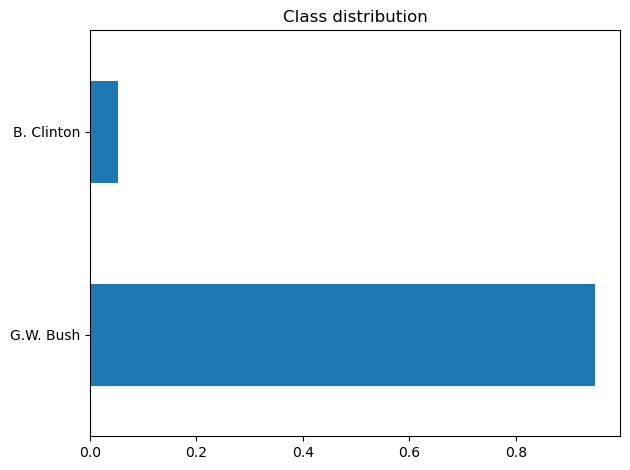

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

class_distribution = pd.Series(y).value_counts(normalize=True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")
pos_label = class_distribution.idxmin()
plt.tight_layout()
print(f"The positive label considered as the minority class is {pos_label}")